# Comparison check between Rosie's original run and latest updates

## Import libraries

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ctsm_py.fates_xarray_funcs as fx

## Load history output data

In [5]:
data_rosie_base = xr.open_dataset('seb_CLM5-SPfates-def_rewindtest0.clm2.h0.2001.nc')
data_rosie_last = xr.open_dataset('greg_sp_test_nosai.clm2.h0.2001.nc')
data_greg_last = xr.open_dataset('sp_mode-dev053-2year-srof.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Ca887ad1f-F51112204.intel.clm2.h0.2001.nc')

## Check the dimension mapping size

## Plot the data

### TLAI

The plots of TLAI below represent the type correction that [Charlie recommended](https://github.com/ESCOMP/CTSM/pull/1182#discussion_r694458033).  We can see comparing the first and second plot to the third, that the TLAI looks correct as of [this commit](https://github.com/ESCOMP/CTSM/pull/1182/commits/b9f4ef9a1eb81981acee8628c0660a9bf6a93fa0).

In [6]:
data_rosie_base.TLAI.dims

('time', 'lat', 'lon')

In [7]:
data_rosie_base.TLAI.time.size

12

In [8]:
tlai_rosie_base = data_rosie_base.TLAI
tlai_rosie_last = data_rosie_last.TLAI
tlai_greg_last = data_greg_last.TLAI
tlai_rbrl_diff = tlai_rosie_base - tlai_rosie_last
tlai_rbgl_diff = tlai_rosie_base - tlai_greg_last
tlai_rlgl_diff = tlai_rosie_last - tlai_greg_last

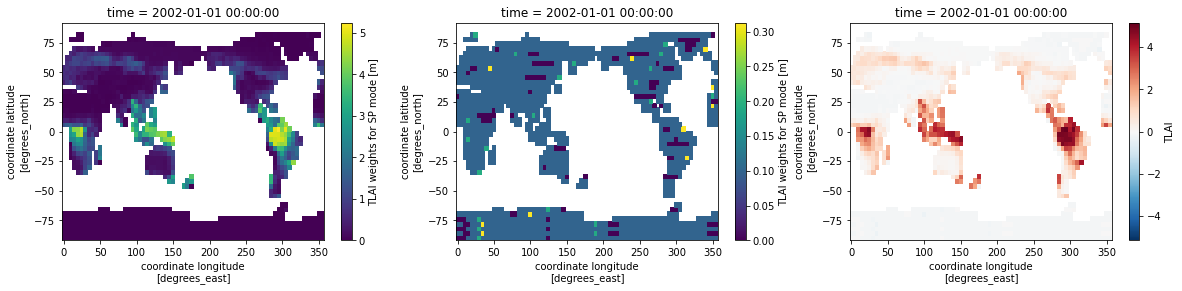

In [9]:
# Rosie baseline - Rosie latest comparison
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_rosie_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rbrl_diff.isel(time=tstop_idx).plot(ax=ax3)

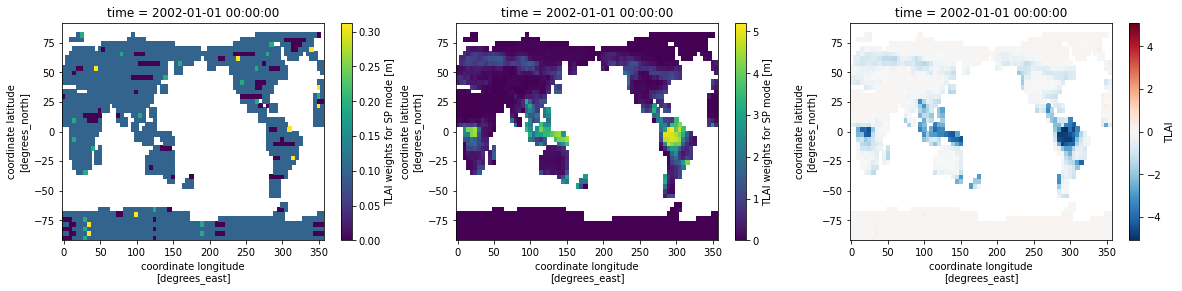

In [10]:
# Rosie latest - Greg latest comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_last.isel(time=tstop_idx).plot(ax=ax1)
tlai_greg_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rlgl_diff.isel(time=tstop_idx).plot(ax=ax3)

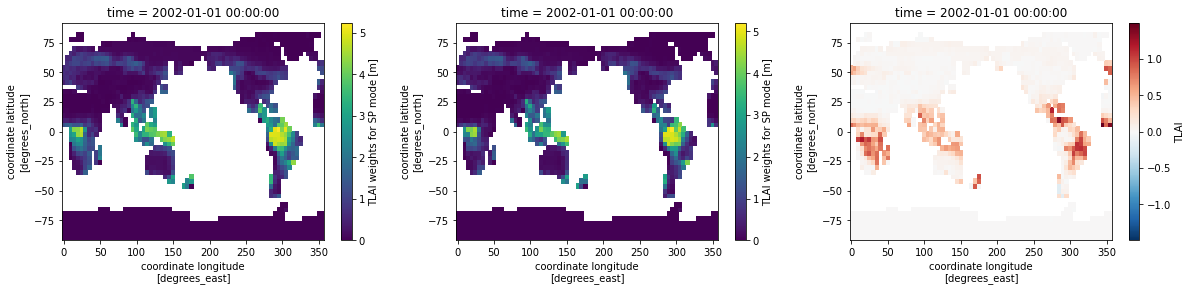

In [11]:
# Rosie baseline - Greg latest comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_greg_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rbgl_diff.isel(time=tstop_idx).plot(ax=ax3)

### GPP

In [12]:
data_rosie_base.GPP.dims

('time', 'lat', 'lon')

In [13]:
gpp_rosie_base = data_rosie_base.GPP
gpp_rosie_last = data_rosie_last.GPP
gpp_greg_last = data_greg_last.GPP
gpp_rbrl_diff = gpp_rosie_base - gpp_rosie_last
gpp_rbgl_diff = gpp_rosie_base - gpp_greg_last
gpp_rlgl_diff = gpp_rosie_last - gpp_greg_last

In [14]:
np.max(gpp_rosie_last)

<xarray.DataArray 'GPP' ()>
array(0.00014311)

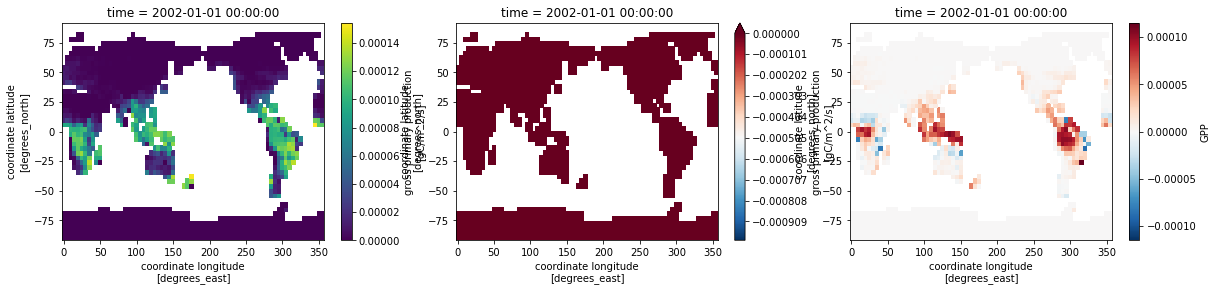

In [15]:
# Rosie baseline - Rosie latest comparison
levrng = np.arange(0.,0.00015,0.00001)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_rosie_last.isel(time=tstop_idx).plot(ax=ax2,levels=np.arange(-0.001,0,.000001))
gpp_rbrl_diff.isel(time=tstop_idx).plot(ax=ax3)

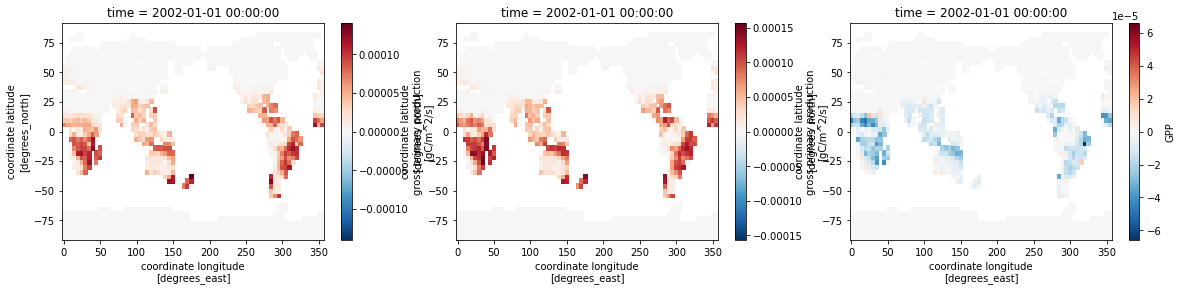

In [16]:
# Rosie latest - Greg latest comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_last.isel(time=tstop_idx).plot(ax=ax1)
gpp_greg_last.isel(time=tstop_idx).plot(ax=ax2)
gpp_rlgl_diff.isel(time=tstop_idx).plot(ax=ax3)

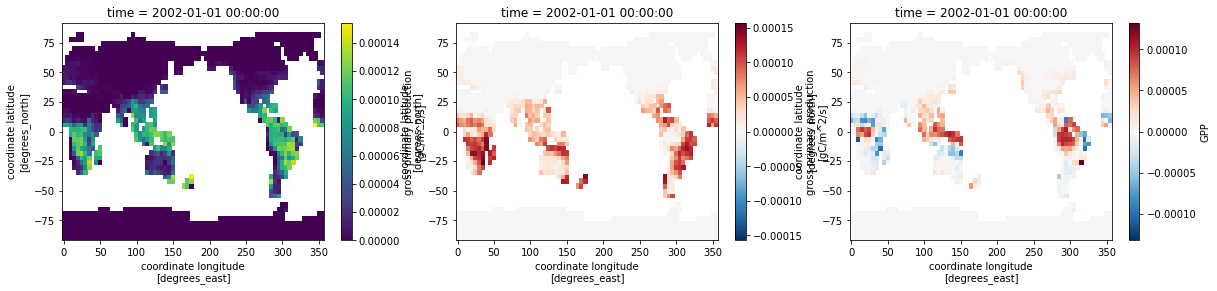

In [17]:
# Rosie baseline - Greg latest comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_greg_last.isel(time=tstop_idx).plot(ax=ax2)
gpp_rbgl_diff.isel(time=tstop_idx).plot(ax=ax3)

### PFTnindivs

In [18]:
data_rosie_base.PFTnindivs

<xarray.DataArray 'PFTnindivs' (time: 12, fates_levpft: 12, lat: 46, lon: 72)>
[476928 values with dtype=float32]
Coordinates:
  * fates_levpft  (fates_levpft) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * time          (time) object 2001-02-01 00:00:00 ... 2002-01-01 00:00:00
  * lon           (lon) float32 0.0 5.0 10.0 15.0 ... 340.0 345.0 350.0 355.0
  * lat           (lat) float32 -90.0 -86.0 -82.0 -78.0 ... 78.0 82.0 86.0 90.0
Attributes:
    long_name:     total PFT level number of individuals
    units:         indiv / m2
    cell_methods:  time: mean

In [19]:
npft_rosie_base = data_rosie_base.PFTnindivs
npft_rosie_last = data_rosie_last.PFTnindivs
npft_greg_last = data_greg_last.PFTnindivs
npft_rbrl_diff = npft_rosie_base - npft_rosie_last
npft_rbgl_diff = npft_rosie_base - npft_greg_last
npft_rlgl_diff = npft_rosie_last - npft_greg_last

In [20]:
np.max(npft_rosie_last)

<xarray.DataArray 'PFTnindivs' ()>
array(927.69525146)

In [21]:
np.max(npft_rosie_base)

<xarray.DataArray 'PFTnindivs' ()>
array(3170.33203125)

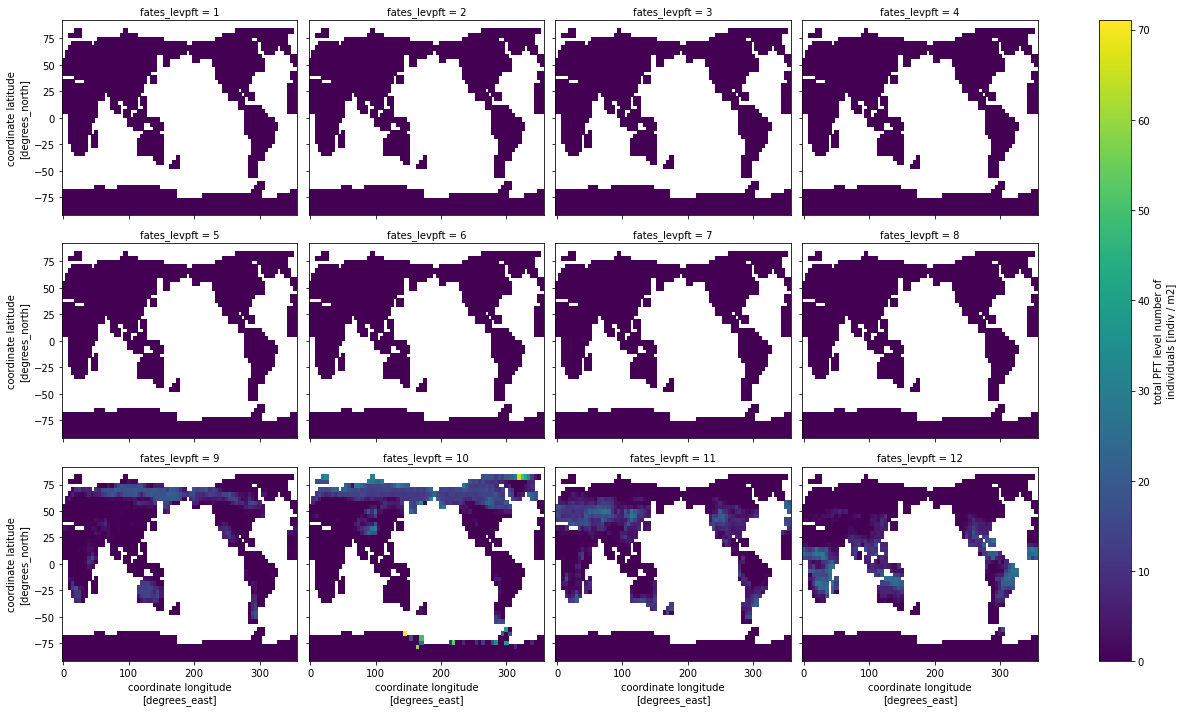

In [22]:
# Rosie baseline: all levels
npft_rosie_base.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=(18,10))

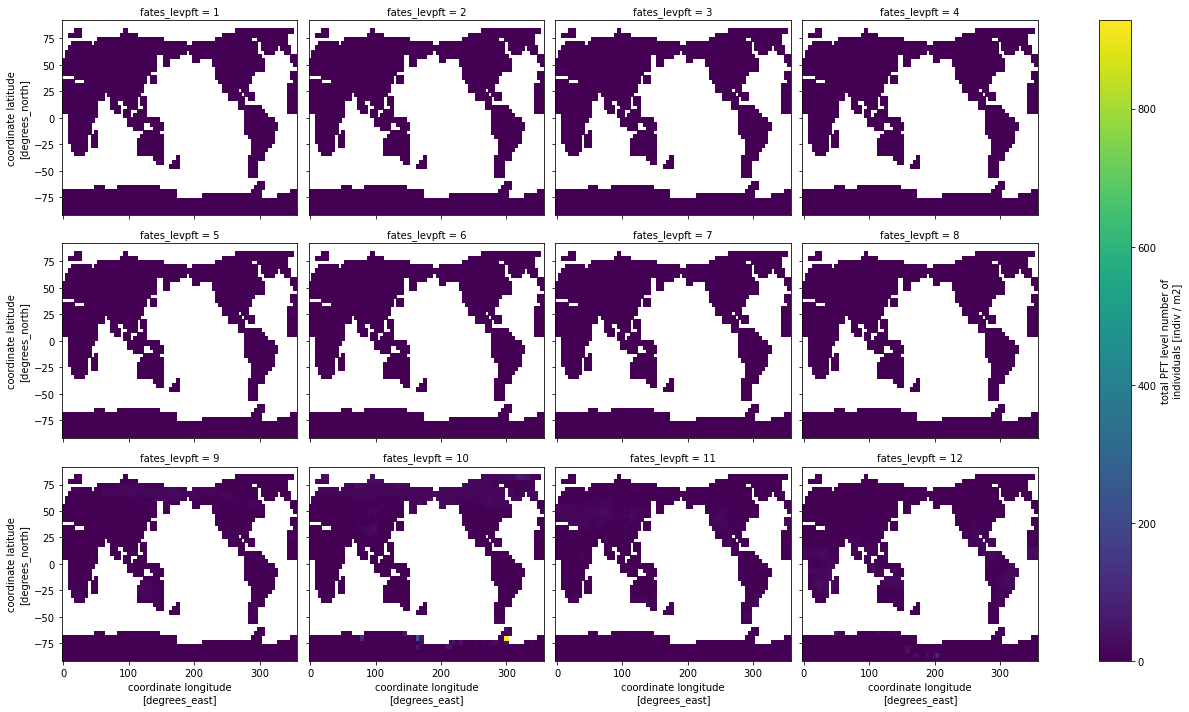

In [23]:
# Rosie latest: all levels
npft_rosie_last.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=(18,10))

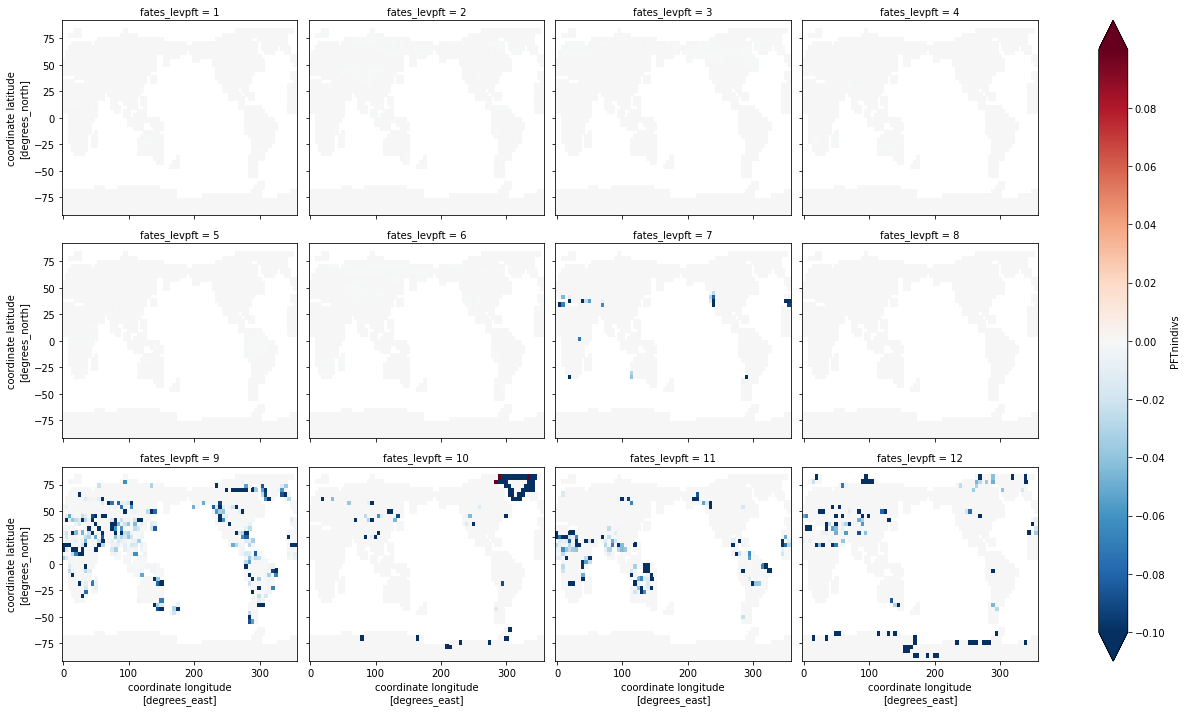

In [32]:
# Rosie baseline-Rosie latest: all levels
levrng = np.arange(-1,1,.001)
npft_rbrl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=(18,10),levels=np.arange(-0.1,0.1,.00001))

### PFTbiomass

In [25]:
data_rosie_base.PFTbiomass.dims

('time', 'fates_levpft', 'lat', 'lon')

In [26]:
data_rosie_base.PFTbiomass.fates_levpft.size

12

In [27]:
pbm_rosie_base = data_rosie_base.PFTbiomass
pbm_rosie_last = data_rosie_last.PFTbiomass
pbm_greg_last = data_greg_last.PFTbiomass.mean()
pbm_rbrl_diff = pbm_rosie_base - pbm_rosie_last
pbm_rbgl_diff = pbm_rosie_base - pbm_greg_last
pbm_rlgl_diff = pbm_rosie_last - pbm_greg_last

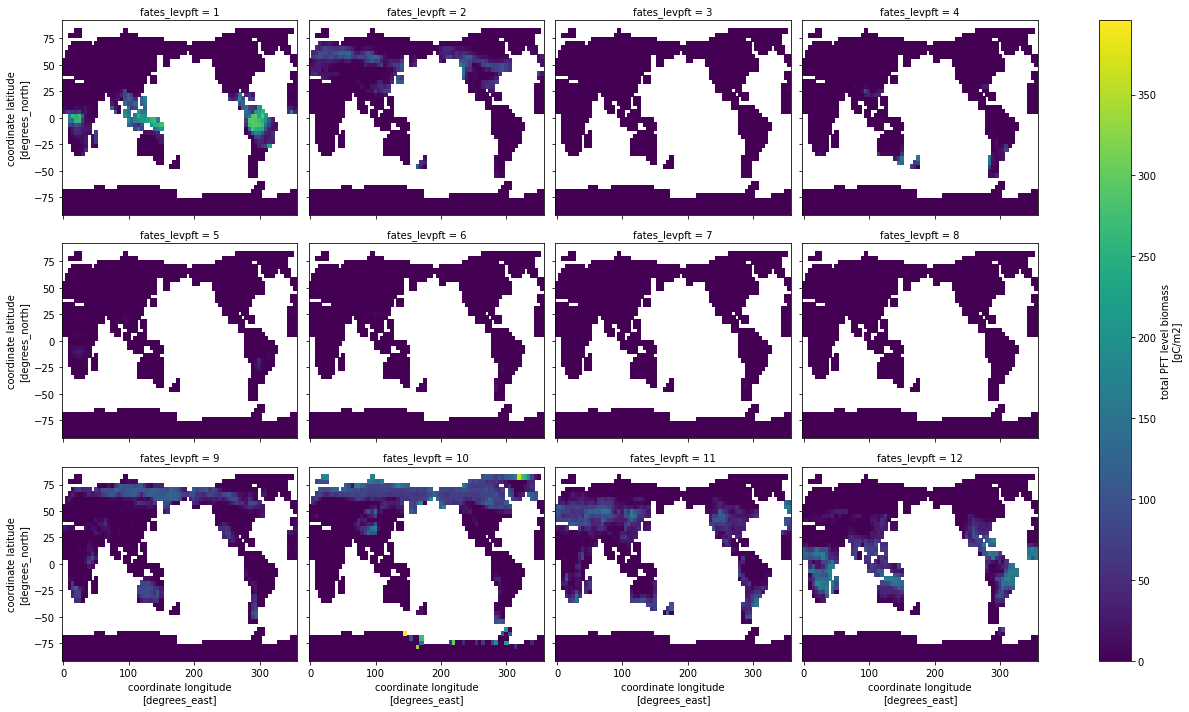

In [28]:
# Rosie baseline: all levels
pbm_rosie_base.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=(18,10))

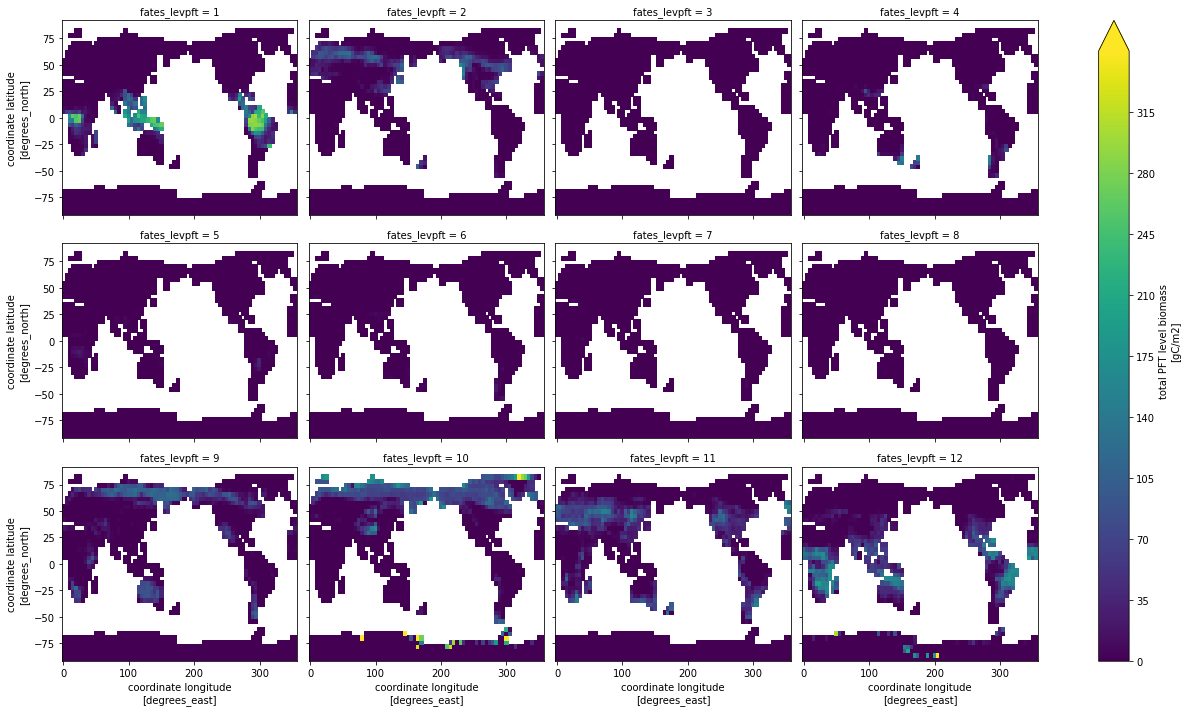

In [29]:
# Rosie latest: all levels
pbm_rosie_last.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=(18,10),levels=np.arange(0.,350.,0.0001))

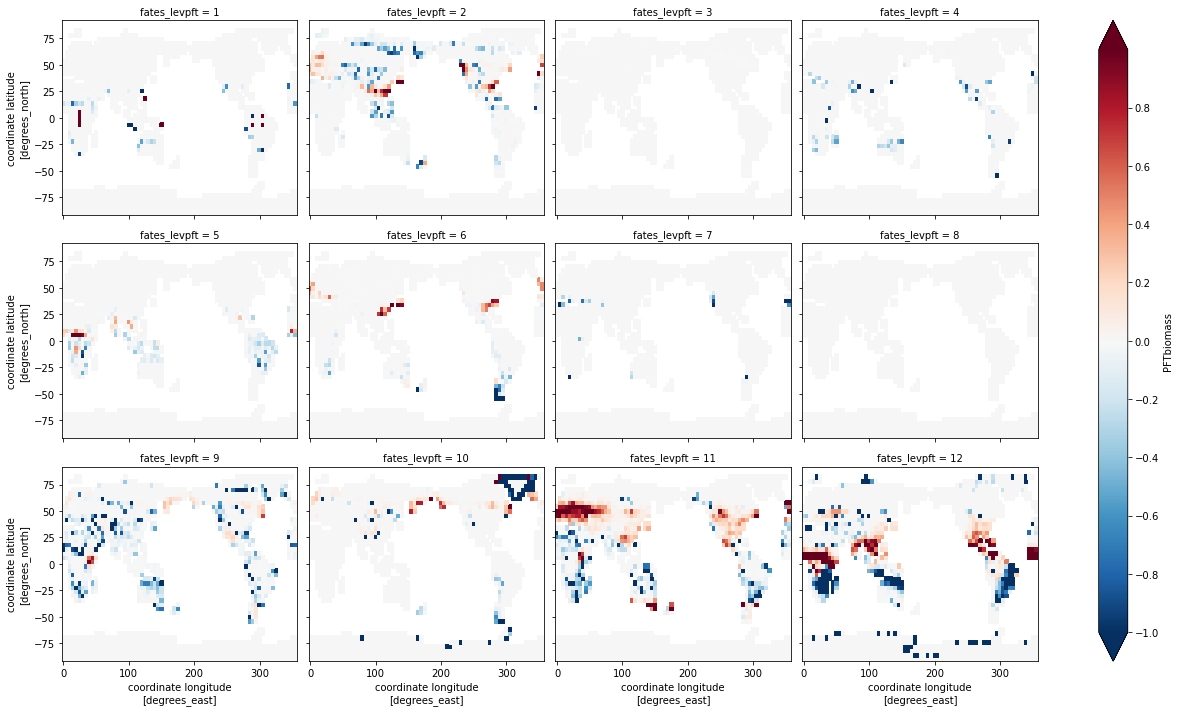

In [30]:
# Rosie baseline-Rosie latest: all levels
levrng = np.arange(-1,1,.001)
pbm_rbrl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=(18,10),levels=levrng)

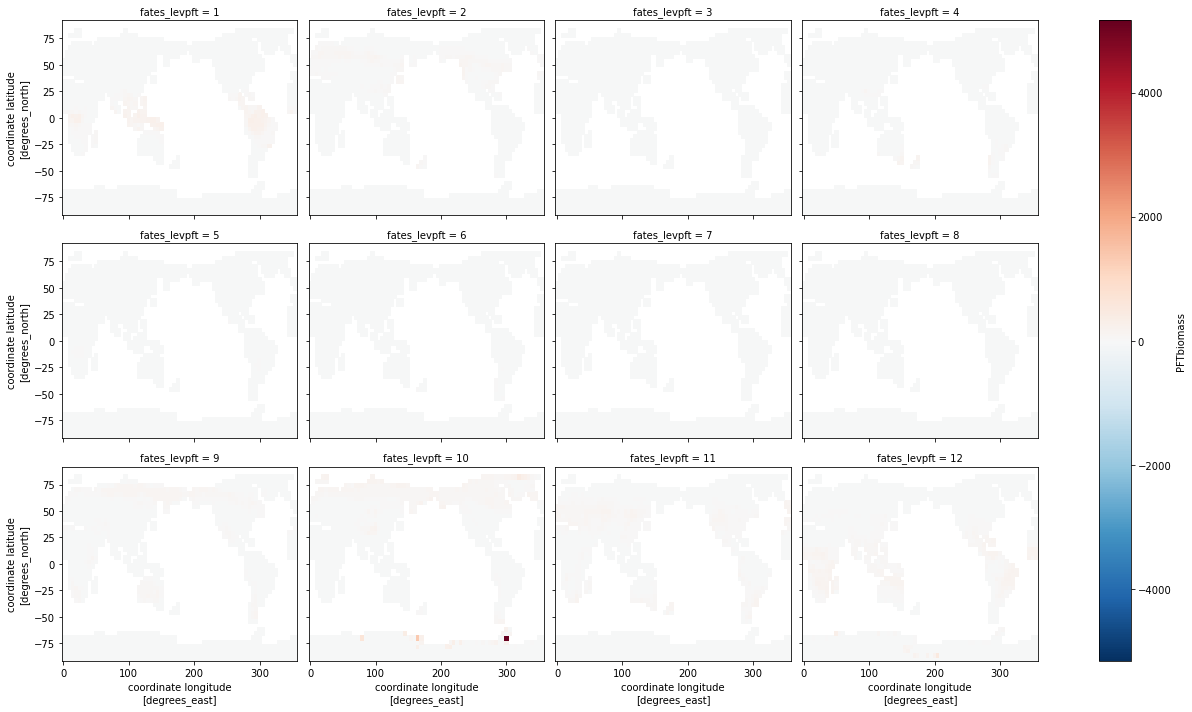

In [31]:
# Rosie latest - Greg latest: all levels
pbm_rlgl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=(18,10))